<a href="https://colab.research.google.com/github/EstherMamai/UnsupervisedLearning/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [328]:
df=pd.read_csv('/content/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [330]:
df.set_index('ID',inplace=True)

In [331]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [332]:
df.shape

(2000, 7)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [334]:
df.duplicated().sum()

0

In [335]:
df.isnull().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


## Mapping Categorical Values

In [336]:
df2=df.copy()

# Mapping categorical variables
sex_map = {0: "Male", 1: "Female"}
marital_status_map = {0: "Single", 1: "Non-Single"}
education_map = {0: "Other/Unknown", 1: "High School", 2: "University", 3: "Graduate School"}
occupation_map = {0: "Unemployed/Unskilled", 1: "Skilled Employee/Official", 2: "Management/Self-Employed/Highly Qualified"}
settlement_map = {0: "Small City", 1: "Mid-Sized City", 2: "Big City"}

# Apply mapping
df2["Sex"] = df2["Sex"].map(sex_map)
df2["Marital status"] = df["Marital status"].map(marital_status_map)
df2["Education"] = df2["Education"].map(education_map)
df2["Occupation"] = df2["Occupation"].map(occupation_map)
df2["Settlement size"] = df2["Settlement size"].map(settlement_map)

In [337]:
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,Male,Single,67,University,124670,Skilled Employee/Official,Big City
100000002,Female,Non-Single,22,High School,150773,Skilled Employee/Official,Big City
100000003,Male,Single,49,High School,89210,Unemployed/Unskilled,Small City
100000004,Male,Single,45,High School,171565,Skilled Employee/Official,Mid-Sized City
100000005,Male,Single,53,High School,149031,Skilled Employee/Official,Mid-Sized City


## EDA

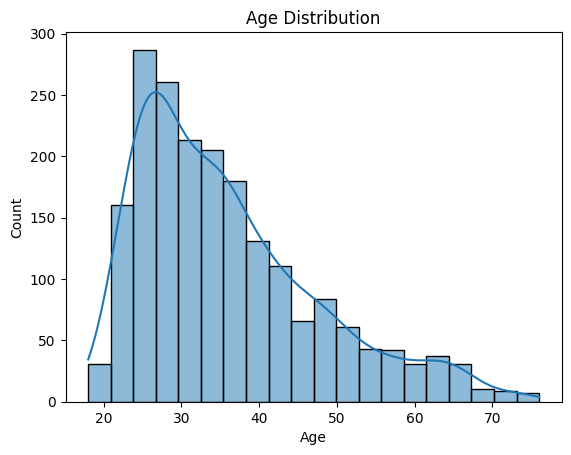

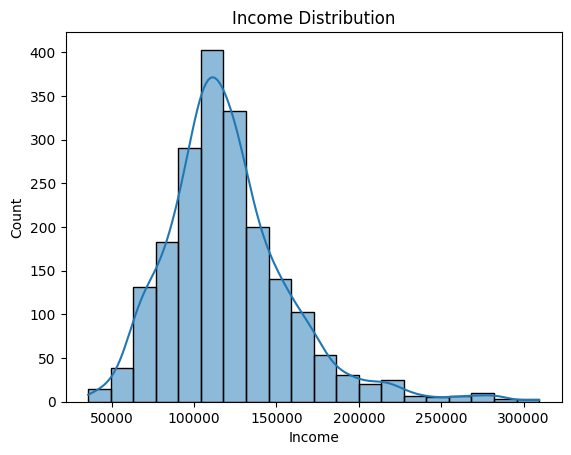

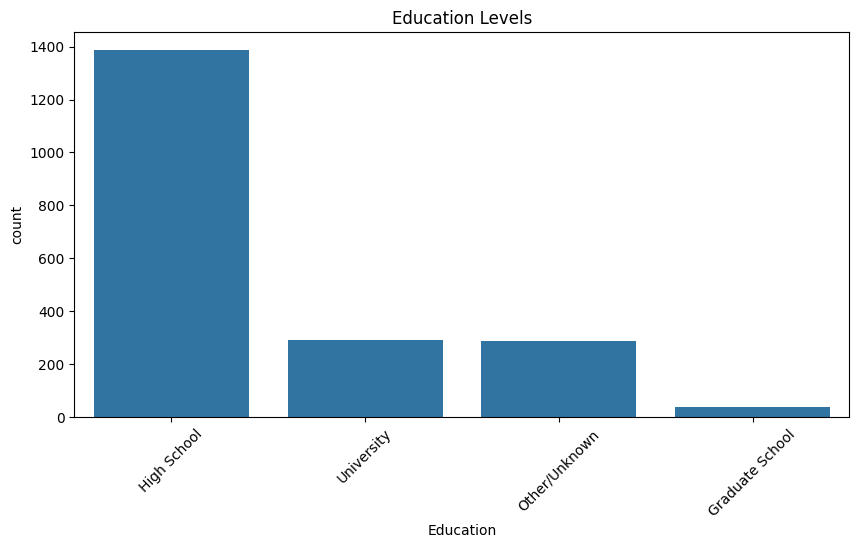

In [338]:
# Age Distribution
sns.histplot(df2["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Income Distribution
sns.histplot(df2["Income"], bins=20, kde=True)
plt.title("Income Distribution")
plt.show()

# Count of categories
plt.figure(figsize=(10, 5))
sns.countplot(x="Education", data=df2, order=df2["Education"].value_counts().index)
plt.title("Education Levels")
plt.xticks(rotation=45)
plt.show()

Pie charts for easier visualization

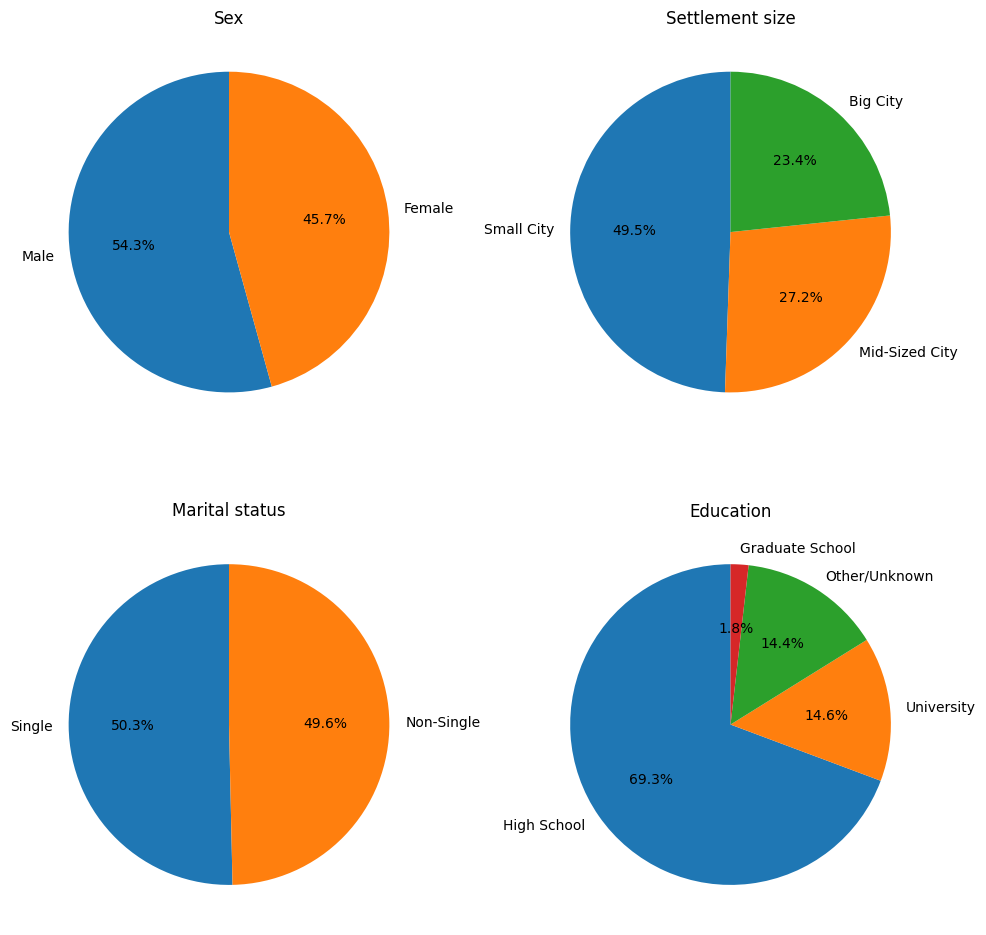

In [339]:
categories = ['Sex', 'Settlement size', 'Marital status', 'Education']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid

axes = axes.flatten()

for i, col in enumerate(categories):
    df2[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)  # Set title
    axes[i].set_ylabel('')  # Hide y-label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [340]:
df2["Age"].min()

18

## Feature Engineering

Non-categorical columns, age and Income were grouped

In [341]:
# Grouping by age
age_bins = [18, 25, 35, 45, 55, 65, 76]  # Bins
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Labels

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [342]:
# Define income bins
income_bins = [35000, 60000, 100000, 150000, 200000, 310000]  # Adjust as needed
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']

df['Income Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

In [343]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age Group,Income Group
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,65+,Middle
100000002,1,1,22,1,150773,1,2,18-24,Upper-Middle
100000003,0,0,49,1,89210,0,0,45-54,Lower-Middle
100000004,0,0,45,1,171565,1,1,35-44,Upper-Middle
100000005,0,0,53,1,149031,1,1,45-54,Middle


In [344]:
df.drop(['Age', 'Income'],axis=1,inplace=True)

In [345]:
df.head()

,Sex,Marital status,Education,Occupation,Settlement size,Age Group,Income Group
ID,,,,,,,
100000001,0,0,2,1,2,65+,Middle
100000002,1,1,1,1,2,18-24,Upper-Middle
100000003,0,0,1,0,0,45-54,Lower-Middle
100000004,0,0,1,1,1,35-44,Upper-Middle
100000005,0,0,1,1,1,45-54,Middle


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Sex              2000 non-null   int64   
 1   Marital status   2000 non-null   int64   
 2   Education        2000 non-null   int64   
 3   Occupation       2000 non-null   int64   
 4   Settlement size  2000 non-null   int64   
 5   Age Group        1997 non-null   category
 6   Income Group     2000 non-null   category
dtypes: category(2), int64(5)
memory usage: 98.1 KB


**Encoding Categorical Variables**


In [347]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Age Group'] = encoder.fit_transform(df['Age Group'])
df['Income Group'] = encoder.fit_transform(df['Income Group'])

In [348]:
df.head()

,Sex,Marital status,Education,Occupation,Settlement size,Age Group,Income Group
ID,,,,,,,
100000001,0,0,2,1,2,5,3
100000002,1,1,1,1,2,0,4
100000003,0,0,1,0,0,3,2
100000004,0,0,1,1,1,2,4
100000005,0,0,1,1,1,3,3


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Education        2000 non-null   int64
 3   Occupation       2000 non-null   int64
 4   Settlement size  2000 non-null   int64
 5   Age Group        2000 non-null   int64
 6   Income Group     2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


#K Means Clustering

## Determining Optimal Number of Clusters
**Elbow Method**

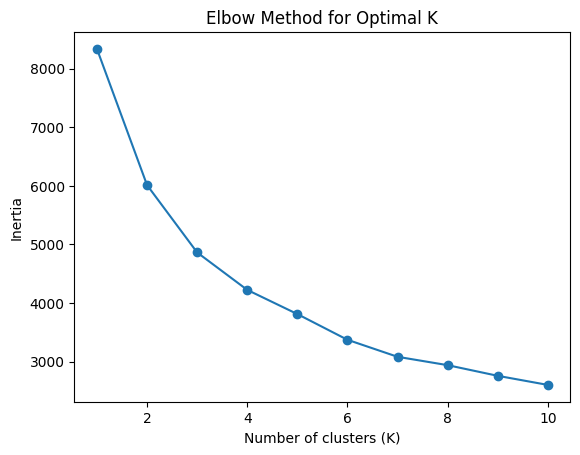

In [350]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

**Silhoutte Method**

For K=2, Silhouette Score: 0.27933964426865987
For K=3, Silhouette Score: 0.24679267346330017
For K=4, Silhouette Score: 0.2663789901762101
For K=5, Silhouette Score: 0.23940216162116532
For K=6, Silhouette Score: 0.23984110286382798
For K=7, Silhouette Score: 0.2352003535488592
For K=8, Silhouette Score: 0.23405279910580465
For K=9, Silhouette Score: 0.24764904210074515
For K=10, Silhouette Score: 0.24925646487379918


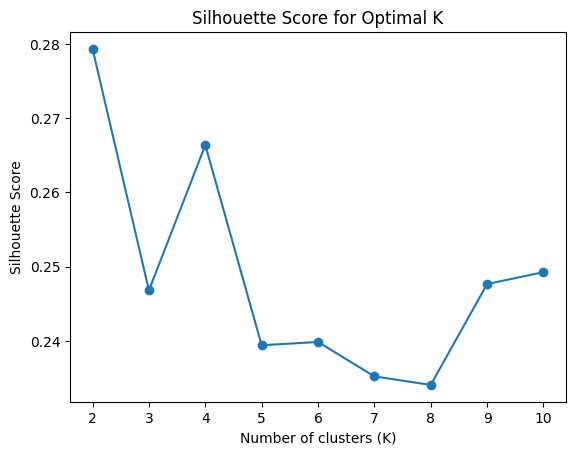

In [351]:
from sklearn.metrics import silhouette_score
K_range = range(2, 11)
silhuette=[]
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f'For K={k}, Silhouette Score: {score}')
    silhuette.append(score)

plt.plot(K_range, silhuette, marker='o') # Plot K_range against silhuette
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score') # Change y-label to 'Silhouette Score'
plt.title('Silhouette Score for Optimal K') # Change title to reflect the plot
plt.show()

**Davis Boulding Method**

For K=2, Davies-Bouldin Score: 1.4753987722897273
For K=3, Davies-Bouldin Score: 1.464317747844075
For K=4, Davies-Bouldin Score: 1.2657668934622919
For K=5, Davies-Bouldin Score: 1.3316966403151889
For K=6, Davies-Bouldin Score: 1.288083474693832
For K=7, Davies-Bouldin Score: 1.3203448911831814
For K=8, Davies-Bouldin Score: 1.3606007628384957
For K=9, Davies-Bouldin Score: 1.3668130444908861
For K=10, Davies-Bouldin Score: 1.3366449254754464


Text(0, 0.5, 'Davies-Bouldin Score')

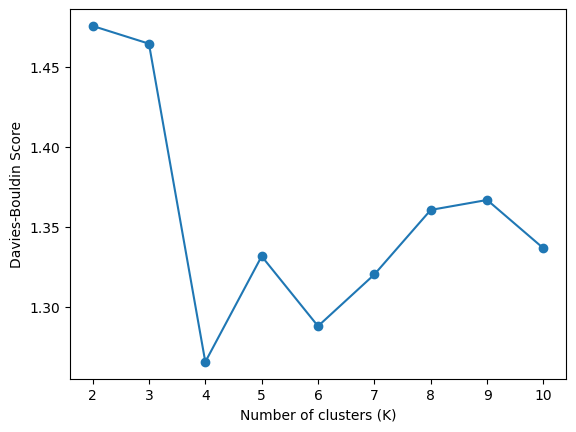

In [352]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    davies_bouldin = davies_bouldin_score(df, labels)
    davies_bouldin_scores.append(davies_bouldin)
    print(f'For K={k}, Davies-Bouldin Score: {davies_bouldin}')

plt.plot(range(2, 11), davies_bouldin_scores, marker='o') # Plot K_range against davies_bouldin_scores
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score') # Change y-label to 'Davies-Bouldin Score'

From the elbow cluster Method, best k=6
DBSCAN is used to prove this value

**DBSCAN**

In [353]:
from sklearn.cluster import DBSCAN

db = DBSCAN()
db.fit(df)

print(silhouette_score(df, db.labels_))
print(davies_bouldin_score(df, db.labels_))

0.6258811112116166
1.267900495330594


## KMeans Clustering

In [354]:
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)


In [355]:
df.head()

,Sex,Marital status,Education,Occupation,Settlement size,Age Group,Income Group,Cluster
ID,,,,,,,,
100000001,0,0,2,1,2,5,3,4
100000002,1,1,1,1,2,0,4,0
100000003,0,0,1,0,0,3,2,2
100000004,0,0,1,1,1,2,4,3
100000005,0,0,1,1,1,3,3,3


In [356]:
df['Cluster'].value_counts()

,count
Cluster,
1,630
0,499
3,310
2,309
4,173
5,79


<Axes: xlabel='Cluster', ylabel='Income Group'>

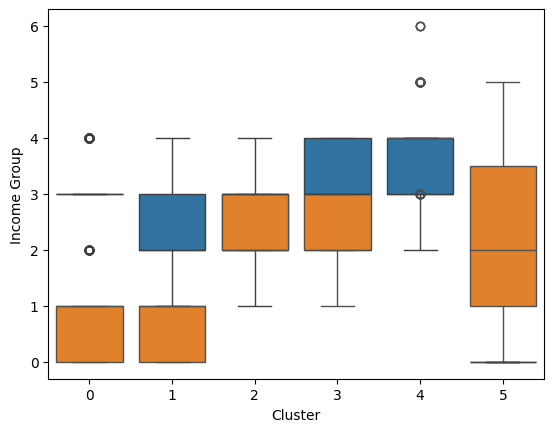

In [357]:
sns.boxplot(x=df['Cluster'], y=df['Income Group'])
sns.boxplot(x=df['Cluster'], y=df['Age Group'])


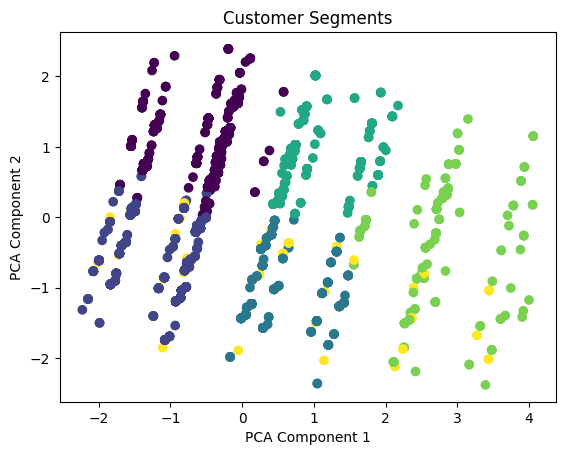

In [358]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments')
plt.show()


In [359]:
df_revision=pd.read_csv('/content/segmentation data.csv',index_col='ID')

In [360]:
df_revision

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [361]:
df_revision['Cluster']=df['Cluster']
df_revision['Cluster'] = df_revision['Cluster'].astype('category')

In [362]:
df_revision.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,4
100000002,1,1,22,1,150773,1,2,0
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [363]:
df_revision1=df_revision.copy()

<Axes: xlabel='Age', ylabel='Income'>

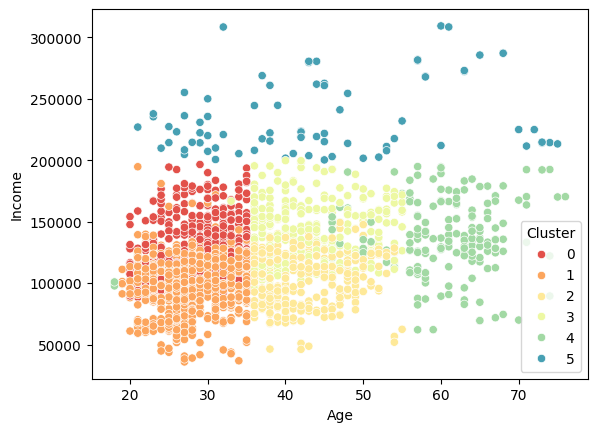

In [364]:
sns.scatterplot(data=df_revision, x='Age', y='Income', hue='Cluster', palette='Spectral')

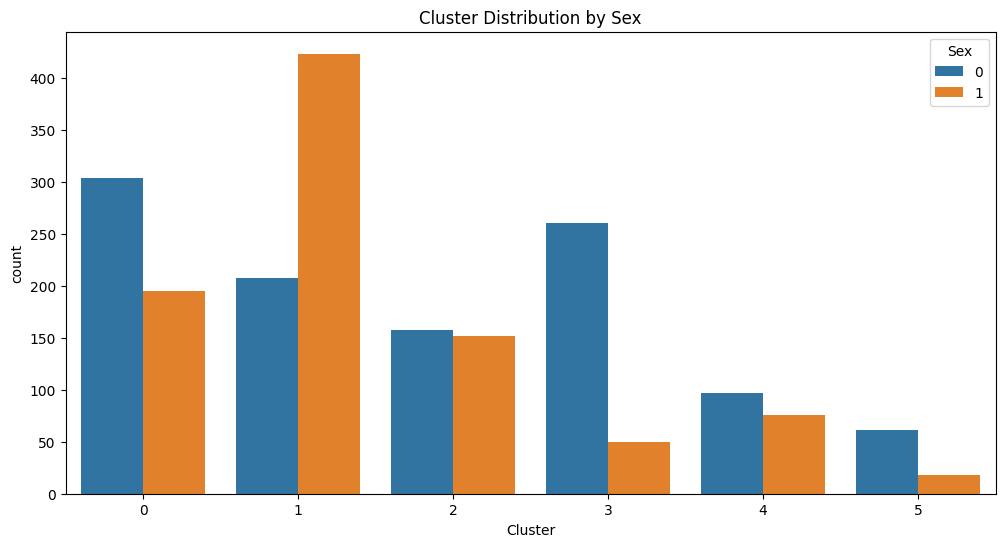

In [365]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_revision, x='Cluster', hue='Sex')
plt.title("Cluster Distribution by Sex")
plt.show()

In [366]:
df_revision.groupby('Cluster').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.390782,0.573146,28.366733,0.753507,127131.404810,1.134269,1.434870
1,0.671429,0.630159,27.488889,0.785714,96454.420635,0.452381,0.031746
2,0.491909,0.339806,42.540453,1.223301,102390.064725,0.300971,0.035599
3,0.161290,0.261290,42.896774,1.170968,141208.187097,1.254839,1.500000
4,0.439306,0.549133,60.052023,2.086705,136937.867052,0.832370,0.843931
5,0.227848,0.367089,44.468354,1.303797,235451.430380,1.822785,1.518987


**Cluster Labeling**

From the average values, the clusters are as follows:

1. **Cluster 0: Young Professionals**

Age: Young (~28 years)

Education: Mostly High School

Income: Above Average ($127,131)

Occupation: Skilled Employees

Settlement: Mostly Mid-Sized/Large Cities

**Label:** "Young Professionals"


2. **Cluster 1: Young Low-Income Workers**

Age: Young (~27.5 years)

Education: Mostly High School

Income: Lower ($96,454)

Occupation: Mostly Unskilled

Settlement: Mostly Small Cities

**Label**: "Young Low-Income Workers"


3. **Cluster 2: Mid-Age Low-Income Group**

Age: Middle-aged (~42.5 years)

Education: Mostly University

Income: Lower ($102,390)

Occupation: Mostly Unskilled

Settlement: Mostly Small Cities

**Label:** "Mid-Age Low-Income Group"


4. **Cluster 3: Mid-Age Affluent Professionals**

Age: Middle-aged (~42.9 years)

Education: Mostly University

Income: Higher ($141,208)

Occupation: Skilled Employees

Settlement: Large Cities

**Label:** "Mid-Age Affluent Professionals"

5. **Cluster 4: Older Educated Middle-Class**

Age: Older (~60 years)

Education: Mostly Graduate School

Income: High ($136,937)

Occupation: Skilled Employees

Settlement: Mid-Sized to Large Cities

**Label:** "Older Educated Middle-Class"

6. **Cluster 5: Wealthy Executives**

Age: Mid-Age (~44.5 years)

Education: Mostly Graduate School

Income: Very High ($235,451)

Occupation: Highly Skilled (Management/Self-Employed

Settlement: Large Cities

**Label:** "Wealthy Executives"

In [367]:
cluster_labels = {
    0: 'Young Professionals',
    1: 'Young Low-Income Workers',
    2: 'Mid-Age Low-Income Group',
    3: 'Mid-Age Affluent Professionals',
    4: 'Older Educated Middle-Class',
    5: 'Wealthy Executives'
}

df_revision['Cluster Label'] = df_revision['Cluster'].map(cluster_labels)


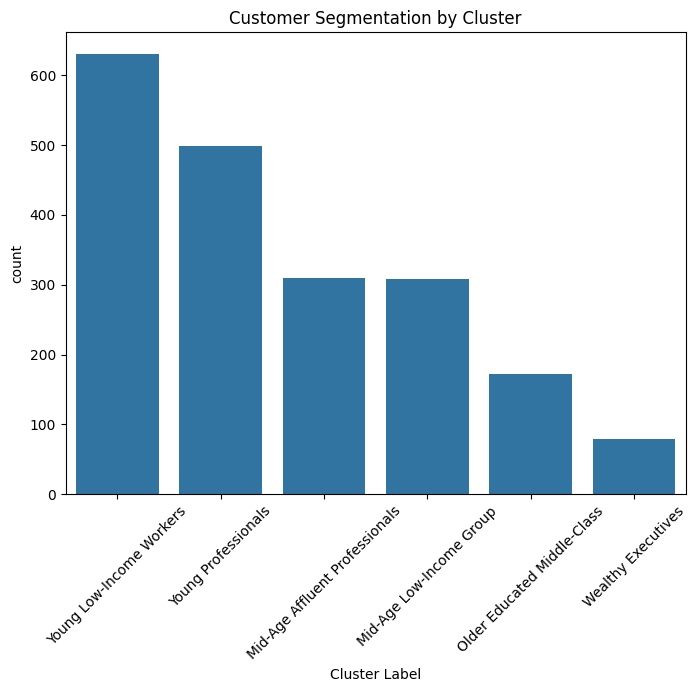

In [368]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster Label', data=df_revision, order=df_revision['Cluster Label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Customer Segmentation by Cluster")
plt.show()

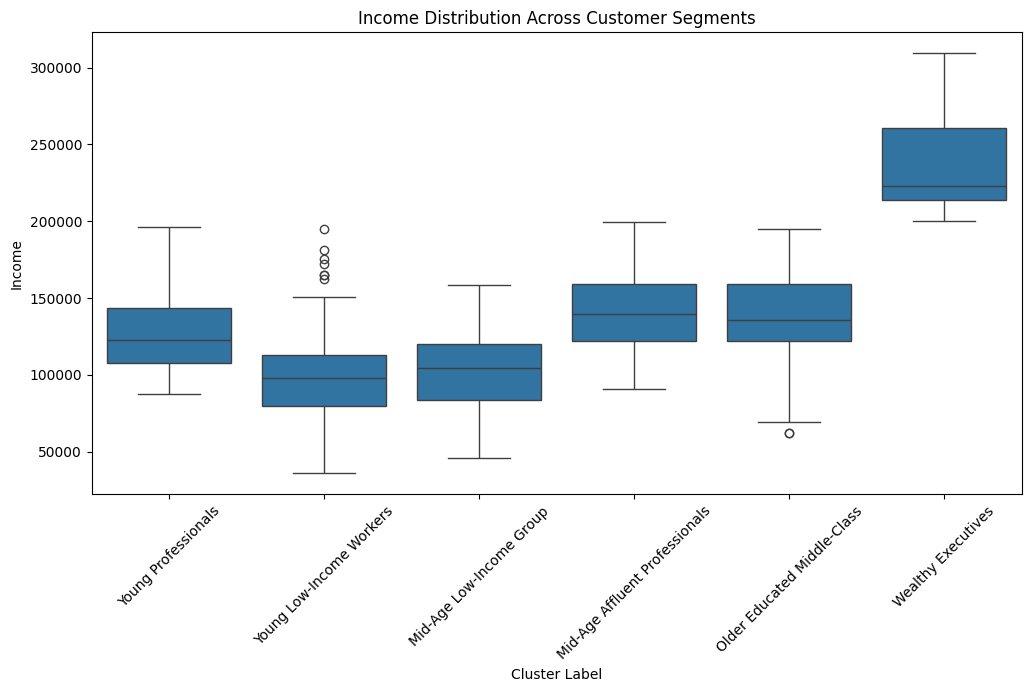

In [369]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster Label', y='Income', data=df_revision)
plt.xticks(rotation=45)
plt.title("Income Distribution Across Customer Segments")
plt.show()


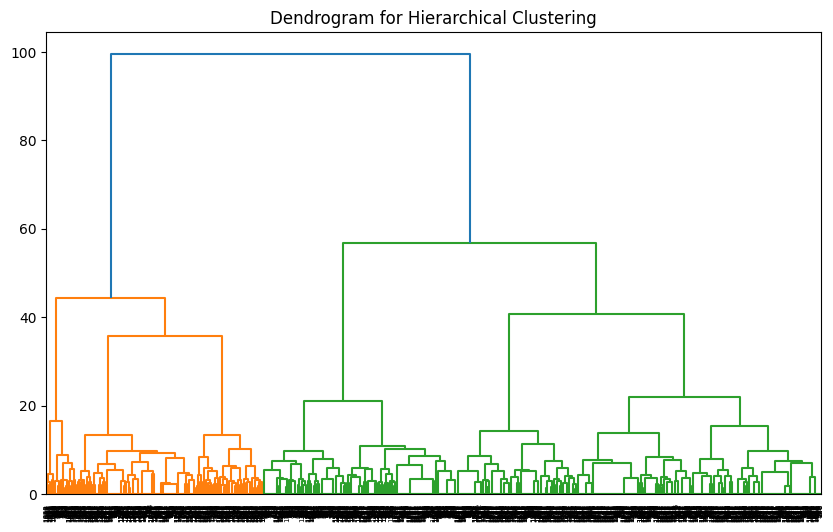

In [370]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


In [371]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_revision1['Cluster'] = agglo.fit_predict(df)

In [372]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df_revision1['Cluster'] = dbscan.fit_predict(df)

In [373]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df_revision1['Cluster'] = gmm.fit_predict(df)

In [374]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
df_revision1['Cluster'] = mean_shift.fit_predict(df)

In [375]:
from sklearn.metrics import silhouette_score

models = {
    'K-Means': KMeans(n_clusters=5, random_state=42, n_init=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    'GMM': GaussianMixture(n_components=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

for name, model in models.items():
    labels = model.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"{name}: Silhouette Score = {score}")


K-Means: Silhouette Score = 0.31277715041585546
Agglomerative: Silhouette Score = 0.31277715041585546
GMM: Silhouette Score = 0.31745261673676795
DBSCAN: Silhouette Score = 0.6128230459825641


DBSCAN has the highest Silhoutte Score thus it is going to be used

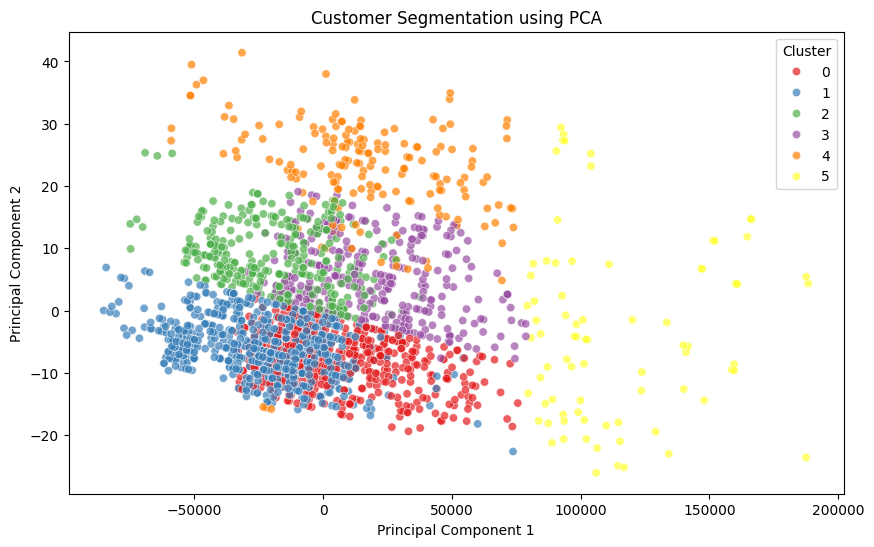

In [376]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_revision1.drop(columns=['Cluster']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_revision['Cluster'], palette='Set1', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA")
plt.legend(title="Cluster")
plt.show()


In [377]:

for eps in [0.2, 0.5, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(df_revision1.drop(columns=['Cluster']))
    print(f"Eps={eps}, Unique Clusters: {np.unique(dbscan.labels_)}")


Eps=0.2, Unique Clusters: [-1]
Eps=0.5, Unique Clusters: [-1]
Eps=1.0, Unique Clusters: [-1]


In [378]:
df_revision1.groupby('Cluster').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.468662,0.501412,33.460757,0.936194,115009.789385,0.765104,0.693394
1,0.366812,0.458515,54.842795,1.825328,166927.951965,1.161572,1.091703
